In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Dataset URL: https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv

In [3]:
#d = pd.read_csv("https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/latest_data/latestdata.csv")

In [4]:
train = pd.read_csv("covid2train.csv", index_col = 0)

In [5]:
def clean(train):
    features = ['age', 'sex', 'country', 'chronic_disease_binary', 'que_paso']
    xtrain = train[features]

# Dropping NA's from only 'sex' + 'country'    
    subset = xtrain.dropna(subset = ['age','sex','country'])
    countries = xtrain['country'].drop_duplicates().dropna()

# Replacing the age ranges with their means    
    mp = {'20-29': np.mean([20,29]), '40-49': np.mean([40,49]),'50-59': np.mean([50,59]),
          '60-69': np.mean([60,69]), '70-79': np.mean([70,79]),
          '80-89': np.mean([80,89]),'90-99': np.mean([90,99]), '80-': 80}
    
# Dictionary replacing countries with numerical values
    mp2 = {}
    key = np.arange(len(countries) + 1)
    for i,j in zip(countries,key):
        val = {i:j}
        mp2.update(val)
        
    mp3 = {'male': 0, 'female': 1}
        
# Updating the training data with new values
    subset = subset.replace(mp).replace(mp2)
    subset = subset.replace(mp3)
    subset['chronic_disease_binary'] = subset['chronic_disease_binary']*1
    subset['age'] = subset['age'].astype(float)
    xtrain = subset.drop('que_paso', axis = 1)
    ytrain = subset['que_paso']
    return xtrain, ytrain

In [6]:
xtrain, ytrain = clean(train)
xtrain['outcome'] = ytrain
all_ds = xtrain

In [7]:
d = all_ds['outcome'] == 0
r= all_ds['outcome'] == 1

In [8]:
#Sex Information
m = all_ds['sex'] == 0
f = all_ds['sex'] == 1

count_s = all_ds['sex'].value_counts()
m_t = count_s[0]
f_t = count_s[1]

m_d = (len(all_ds[m & d])/m_t)*100
f_d = (len(all_ds[f & d])/f_t)*100
m_r = (len(all_ds[m & r])/m_t)*100
f_r = (len(all_ds[f & r])/f_t)*100

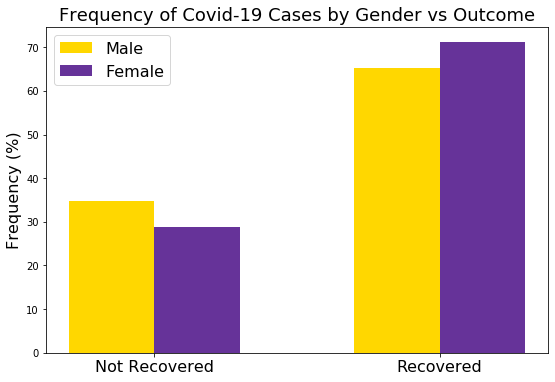

In [9]:
#Freq Sex vs Outcome Plot
labels = ['Not Recovered', 'Recovered']

M = [m_d,m_r]
F = [f_d,f_r]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, M, width, label='Male', color = 'gold')
rects2 = ax.bar(x + .5*width, F, width, label='Female', color = 'rebeccapurple')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Gender vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

plt.show()


In [10]:
#Chronic Disease
n_ch = all_ds['chronic_disease_binary'] == 0
ch = all_ds['chronic_disease_binary'] == 1

count_ch = all_ds['chronic_disease_binary'].value_counts()
n_ch_t = count_ch[0]
ch_t = count_ch[1]

n_ch_d = (len(all_ds[n_ch & d])/m_t)*100
ch_d = (len(all_ds[ch & d])/f_t)*100
n_ch_r = (len(all_ds[n_ch & r])/m_t)*100
ch_r = (len(all_ds[ch & r])/f_t)*100

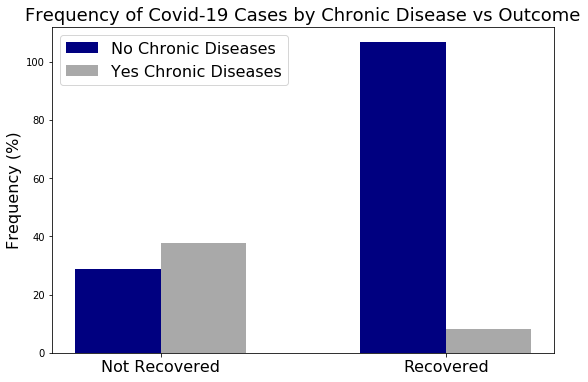

In [11]:
#Freq Sex vs Outcome Plot
labels = ['Not Recovered', 'Recovered']

N_CH = [n_ch_d,n_ch_r]
CH = [ch_d,ch_r]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, N_CH, width, label='No Chronic Diseases', color = 'navy')
rects2 = ax.bar(x + .5*width, CH, width, label='Yes Chronic Diseases', color = 'darkgrey')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Chronic Disease vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

plt.show()

In [12]:
#Country Information
China = all_ds['country'] == 0
Italy = all_ds['country'] == 1
US = all_ds['country'] == 15
Vietnam = all_ds['country'] == 19

count_c = all_ds['country'].value_counts()
China_t = count_c[0]
Italy_t = count_c[1]
US_t = count_c[15]
Vietnam_t = count_c[19]

#death
China_d = (len(all_ds[China & d])/China_t)*100
Italy_d = (len(all_ds[Italy & d])/Italy_t)*100
US_d = (len(all_ds[US & d])/US_t)*100
Vietnam_d = (len(all_ds[Vietnam & d])/Vietnam_t)*100

#recovery
China_r = (len(all_ds[China & r])/China_t)*100
Italy_r = (len(all_ds[Italy & r])/Italy_t)*100
US_r = (len(all_ds[US & r])/US_t)*100
Vietnam_r = (len(all_ds[Vietnam & r])/Vietnam_t)*100

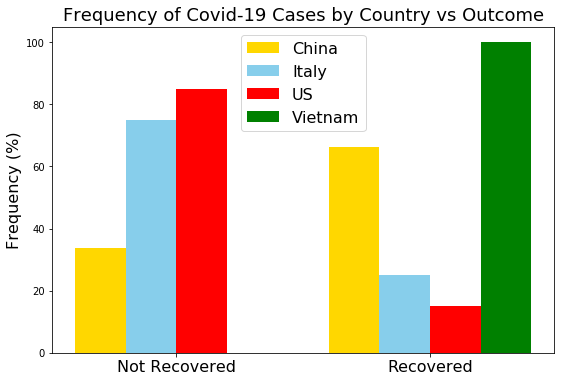

<Figure size 360x360 with 0 Axes>

In [13]:
#Freq Sex vs Outcome Plot
labels = ['Not Recovered', 'Recovered']

CH = [China_d,China_r]
IT = [Italy_d,Italy_r]
US = [US_d,US_r]
VI = [Vietnam_d,Vietnam_r]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - 1.5*width, CH, width, label='China', color = 'gold')
rects2 = ax.bar(x - .5*width, IT, width, label='Italy', color = 'skyblue')
rects2 = ax.bar(x + .5*width, US, width, label='US', color = 'red')
rects1 = ax.bar(x + 1.5*width, VI, width, label='Vietnam', color = 'green')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Country vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc = 'best', fontsize=16)

#fig.tight_layout()
fig = plt.figure(figsize = (5,5))

plt.show()

In [14]:
#print(all_ds)
pd.set_option('display.max_rows', all_ds.shape[0]+1)
#all_ds
count_o = all_ds['outcome'].value_counts()
count_o

1    455
0    218
Name: outcome, dtype: int64

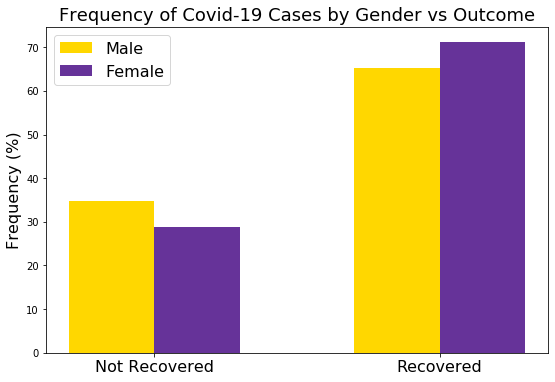

In [15]:
d = all_ds['outcome'] == 0
r= all_ds['outcome'] == 1

#Sex Information
m = all_ds['sex'] == 0
f = all_ds['sex'] == 1

count_s = all_ds['sex'].value_counts()
m_t = count_s[0]
f_t = count_s[1]

m_d = (len(all_ds[m & d])/m_t)*100
f_d = (len(all_ds[f & d])/f_t)*100
m_r = (len(all_ds[m & r])/m_t)*100
f_r = (len(all_ds[f & r])/f_t)*100

#Freq Sex vs Outcome Plot
labels = ['Not Recovered', 'Recovered']

M = [m_d,m_r]
F = [f_d,f_r]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, M, width, label='Male', color = 'gold')
rects2 = ax.bar(x + .5*width, F, width, label='Female', color = 'rebeccapurple')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Gender vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

plt.show()


#Chronic Disease
n_ch = all_ds['chronic_disease_binary'] == 0
ch = all_ds['chronic_disease_binary'] == 1

count_ch = all_ds['chronic_disease_binary'].value_counts()
n_ch_t = count_ch[0]
ch_t = count_ch[1]

n_ch_d = (len(all_ds[n_ch & d])/m_t)*100
ch_d = (len(all_ds[ch & d])/f_t)*100
n_ch_r = (len(all_ds[n_ch & r])/m_t)*100
ch_r = (len(all_ds[ch & r])/f_t)*100

#Country Information
China = all_ds['country'] == 0
Italy = all_ds['country'] == 1
US = all_ds['country'] == 15
Vietnam = all_ds['country'] == 19

count_c = all_ds['country'].value_counts()
China_t = count_c[0]
Italy_t = count_c[1]
US_t = count_c[15]
Vietnam_t = count_c[19]

#death
China_d = (len(all_ds[China & d])/China_t)*100
Italy_d = (len(all_ds[Italy & d])/Italy_t)*100
US_d = (len(all_ds[US & d])/US_t)*100
Vietnam_d = (len(all_ds[Vietnam & d])/Vietnam_t)*100

#recovery
China_r = (len(all_ds[China & r])/China_t)*100
Italy_r = (len(all_ds[Italy & r])/Italy_t)*100
US_r = (len(all_ds[US & r])/US_t)*100
Vietnam_r = (len(all_ds[Vietnam & r])/Vietnam_t)*100

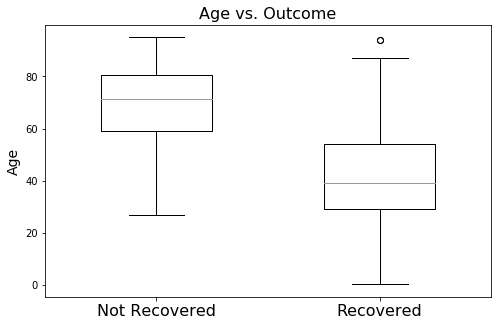

In [16]:
age_death = xtrain['outcome'] == 0
age_rec = xtrain['outcome'] == 1

xdeath = xtrain[age_death]
xrec = xtrain[age_rec]

col1 = xdeath['age']
col2 = xrec['age']

data = [col1, col2]
fig, ax = plt.subplots(figsize = (8,5))
ax.set_title('Age vs. Outcome', fontsize=16)

ax.boxplot(data, labels = ['Non-Recovered', 'Recovered'], widths = 0.5)
ax.set_ylabel("Age", fontsize=14)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

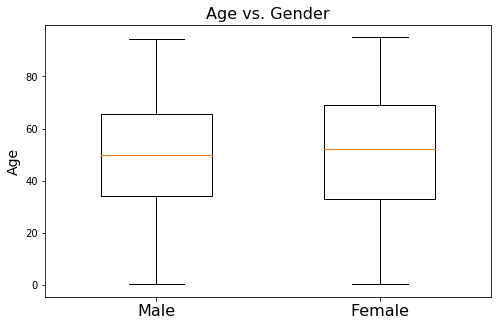

<Figure size 432x288 with 0 Axes>

In [17]:
age_male = xtrain['sex'] == 0
age_female = xtrain['sex'] == 1

xmale = xtrain[age_male]
xfemale = xtrain[age_female]

col1 = xmale['age']
col2 = xfemale['age']

data_age = [col1, col2]
fig, ax = plt.subplots(figsize = (8,5))
ax.set_title('Age vs. Gender', fontsize=16)
labels = ['Male', 'Female']

plt.figure()
ax.boxplot(data_age, labels= ['Male', 'Female'], widths = 0.5)
ax.set_ylabel("Age", fontsize=14)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

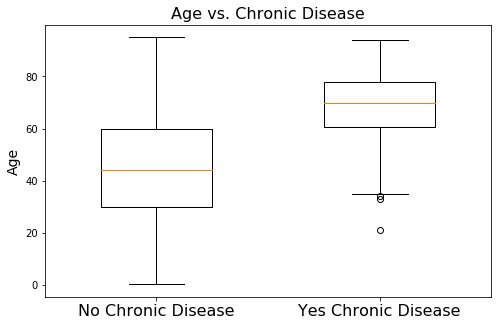

<Figure size 432x288 with 0 Axes>

In [18]:
n_ch = all_ds['chronic_disease_binary'] == 0
ch = all_ds['chronic_disease_binary'] == 1

xn_ch = xtrain[n_ch]
xch = xtrain[ch]

col1 = xn_ch['age']
col2 = xch['age']

data_age = [col1, col2]
fig, ax = plt.subplots(figsize = (8,5))
ax.set_title('Age vs. Chronic Disease', fontsize=16)

labels=['No Chronic Disease', 'Yes Chronic Disease']

plt.figure()
ax.boxplot(data_age, widths = 0.5)
ax.set_ylabel("Age", fontsize=14)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

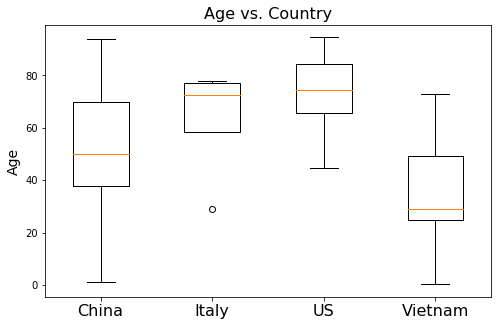

<Figure size 432x288 with 0 Axes>

In [19]:
China = all_ds['country'] == 0
Italy = all_ds['country'] == 1
US = all_ds['country'] == 15
Vietnam = all_ds['country'] == 19

xChina = xtrain[China]
xItaly = xtrain[Italy]
xUS = xtrain[US]
xVietnam = xtrain[Vietnam]

col1 = xChina['age']
col2 = xItaly['age']
col3 = xUS['age']
col4 = xVietnam['age']

data_age = [col1, col2, col3, col4]
fig, ax = plt.subplots(figsize = (8,5))
ax.set_title('Age vs. Country', fontsize=16)

labels=['China','Italy','US','Vietnam']

plt.figure()
ax.boxplot(data_age, widths = 0.5)
ax.set_ylabel("Age", fontsize=14)
ax.set_xticklabels(labels, fontsize=16)
plt.show()

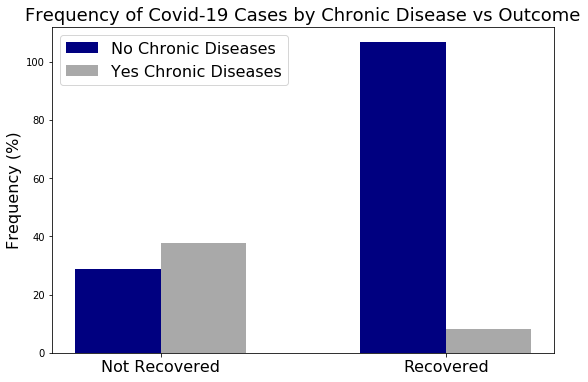

In [20]:
#Freq Sex vs Outcome Plot
labels = ['Not Recovered', 'Recovered']

N_CH = [n_ch_d,n_ch_r]
CH = [ch_d,ch_r]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, N_CH, width, label='No Chronic Diseases', color = 'navy')
rects2 = ax.bar(x + .5*width, CH, width, label='Yes Chronic Diseases', color = 'darkgrey')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Chronic Disease vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

plt.show()

NameError: name 'M_dis' is not defined

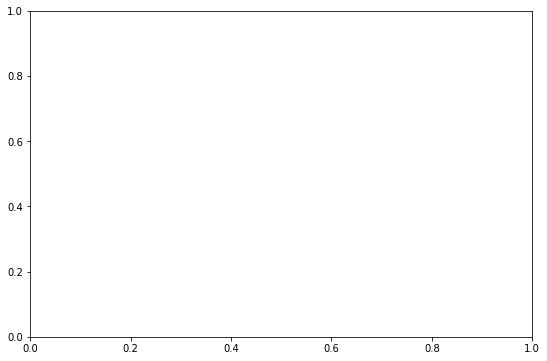

In [21]:
#Sex Information
#Freq Sex vs Chronic Disease Plot
labels = ['No Chronic Disease', 'Yes Chronic Disease']

m_n_ch = (len(all_ds[m & n_ch])/m_t)*100
f_n_ch = (len(all_ds[f & n_ch])/f_t)*100
m_ch = (len(all_ds[m & ch])/m_t)*100
f_ch = (len(all_ds[m & ch])/f_t)*100

N_ch = [m_n_ch,m_ch]
Ch = [f_n_ch,f_ch]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - .5*width, M_dis, width, label='Male', color = 'gold')
rects2 = ax.bar(x + .5*width, F_dis, width, label='Female', color = 'rebeccapurple')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Gender vs Chronic Disease', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='best', fontsize=16)

plt.show()

In [ ]:
#Country Information
#no chronic disease
China_n_ch = (len(all_ds[China & n_ch])/China_t)*100
Italy_n_ch = (len(all_ds[Italy & n_ch])/Italy_t)*100
US_n_ch = (len(all_ds[US & n_ch])/US_t)*100
Vietnam_n_ch = (len(all_ds[Vietnam & n_ch])/Vietnam_t)*100

#chronic disease
China_ch = (len(all_ds[China & ch])/China_t)*100
Italy_ch = (len(all_ds[Italy & ch])/Italy_t)*100
US_ch = (len(all_ds[US & ch])/US_t)*100
Vietnam_ch = (len(all_ds[Vietnam & ch])/Vietnam_t)*100

#Freq Sex vs Outcome Plot
labels = ['No Chronic Disease', 'Chronic Disease']

CH = [China_n_ch,China_ch]
IT = [Italy_n_ch,Italy_ch]
US = [US_n_ch,US_ch]
VI = [Vietnam_n_ch,Vietnam_ch]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize = (9,6))
rects1 = ax.bar(x - 1.5*width, CH, width, label='China', color = 'gold')
rects2 = ax.bar(x - .5*width, IT, width, label='Italy', color = 'skyblue')
rects2 = ax.bar(x + .5*width, US, width, label='US', color = 'red')
rects1 = ax.bar(x + 1.5*width, VI, width, label='Vietnam', color = 'green')

ax.set_ylabel('Frequency (%)', fontsize=16)
ax.set_title('Frequency of Covid-19 Cases by Country vs Outcome', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.legend(loc='middle', fontsize=16)

#fig.tight_layout()
fig = plt.figure(figsize = (5,5))

plt.show()